# Practical 2

# Task 1: The Data

We use the mouse protein expression dataset: https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

Please use the dataset loading code provided below.

** Tasks 1.1: Dataset Exploration **
- How many samples / features are provided?
- How many labels does the dataset have?
- What is the value range of the predictors?
- Visualize the 10 first samples of the dataset
- Visualize the variance of each predictor.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

file = 'Data_Cortex_Nuclear.csv'
df = pd.read_csv(file)

N = 10  # use only every tenth sample
X_all = df.iloc[::N,1:65].to_numpy()
t_all = (df['Behavior'] == 'S/C').to_numpy()[::N]

idx = ~np.any(np.isnan(X_all), axis=1)
X_all = X_all[idx]
t_all = t_all[idx]

In [44]:
spalten=df.iloc[::N,1:65].columns

How many samples / features are provided?
How many labels does the dataset have?

In [45]:
num_features = len(df.columns)
print('Number of features in the dataset = ',num_features)

num_samples = len(df.index)
print('Number of samples in the dataset = ',num_samples)

num_labels = len(df.columns)
print('Number of labels in the dataset = ',num_labels)

feature_name = df.columns
print('Name of the feature = ',feature_name)

Number of features in the dataset =  82
Number of samples in the dataset =  1080
Number of labels in the dataset =  82
Name of the feature =  Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N'

In [50]:
df_new = df
df_new = df_new.replace(np.nan,0)

In [47]:
#y_df_train = pd.DataFrame(y_train, columns=["Behavior"])

What is the value range of the predictors?

In [48]:
for x in range(1,66):
    print(df.columns[x], np.amin(X_all[x]), np.amax(X_all[x]))

DYRK1A_N 0.094356865 3.66105818
ITSN1_N 0.089955526 4.571179951
BDNF_N 0.11935436099999999 5.915039429
NR1_N 0.10721721 5.101000566000001
NR2A_N 0.103411756 6.318466994
pAKT_N 0.117759202 4.887096774
pBRAF_N 0.09164912300000001 3.619627672
pCAMKII_N 0.12506209599999998 4.764640392
pCREB_N 0.109953305 4.190910702
pELK_N 0.104504325 2.854996624
pERK_N 0.118344384 4.56245757
pJNK_N 0.11661211099999999 4.770715631
PKCA_N 0.106956933 3.329082166
pMEK_N 0.112179104 4.977287762
pNR1_N 0.076089445 5.60960961
pNR2A_N 0.062811245 4.987899073
pNR2B_N 0.129116118 6.474237645
pPKCAB_N 0.113356766 5.497302157999999
pRSK_N 0.104456825 3.733888645
AKT_N 0.099263374 4.405236292
BRAF_N 0.11578186300000001 5.185282141
CAMKII_N 0.09908909099999999 4.654004432
CREB_N 0.11090031 5.799972276
ELK_N 0.122368147 5.534341362999999
ERK_N 0.116148148 4.146413216
GSK3B_N 0.093149466 4.051117711
JNK_N 0.090707287 5.179948932
MEK_N 0.082373173 4.75273224
TRKA_N 0.102092688 4.286193404
RSK_N 0.115090253 5.256263931999

Visualize the 10 first samples of the dataset

In [49]:
sample_ten = X_all[0:10,]

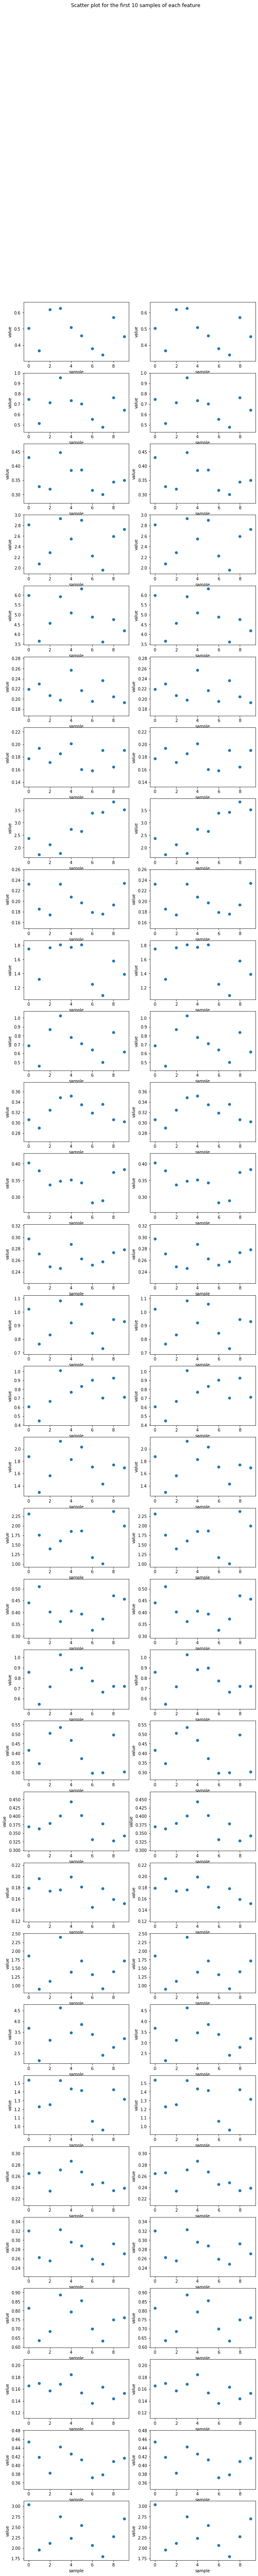

In [8]:
fig,axs = plt.subplots(32,2,figsize =(10,100))
fig.suptitle('Scatter plot for the first 10 samples of each feature')

for i in range(32):
        axs[i][0].scatter(range(10),sample_ten[:,i])
        axs[i][0].set_ylabel('value')
        axs[i][0].set_xlabel('sample')
for j in range(32):
        axs[j][1].scatter(range(10),sample_ten[:,j])
        axs[j][1].set_ylabel('value')
        axs[j][1].set_xlabel('sample')

In [9]:
means=[]
for i in range(64):
    means.append(sample_ten[:,i].mean())
spalten2=np.array(spalten)
namen = spalten2.tolist()
colors = ['black', 'orangered', 'blue',  'yellow',  'red', 'green', 'grey', 'cyan', 'orange', 'darkorchid', 'black', 'orangered', 'blue',  'yellow',  'red', 'green', 'grey', 'cyan', 'orange', 'darkorchid', 'black', 'orangered', 'blue',  'yellow',  'red', 'green', 'grey', 'cyan', 'orange', 'darkorchid', 'black', 'orangered', 'blue',  'yellow',  'red', 'green', 'grey', 'cyan', 'orange', 'darkorchid', 'black', 'orangered', 'blue',  'yellow',  'red', 'green', 'grey', 'cyan', 'orange', 'darkorchid', 'black', 'orangered', 'blue',  'yellow',  'red', 'green', 'grey', 'cyan', 'orange', 'darkorchid','grey', 'cyan', 'orange', 'darkorchid']

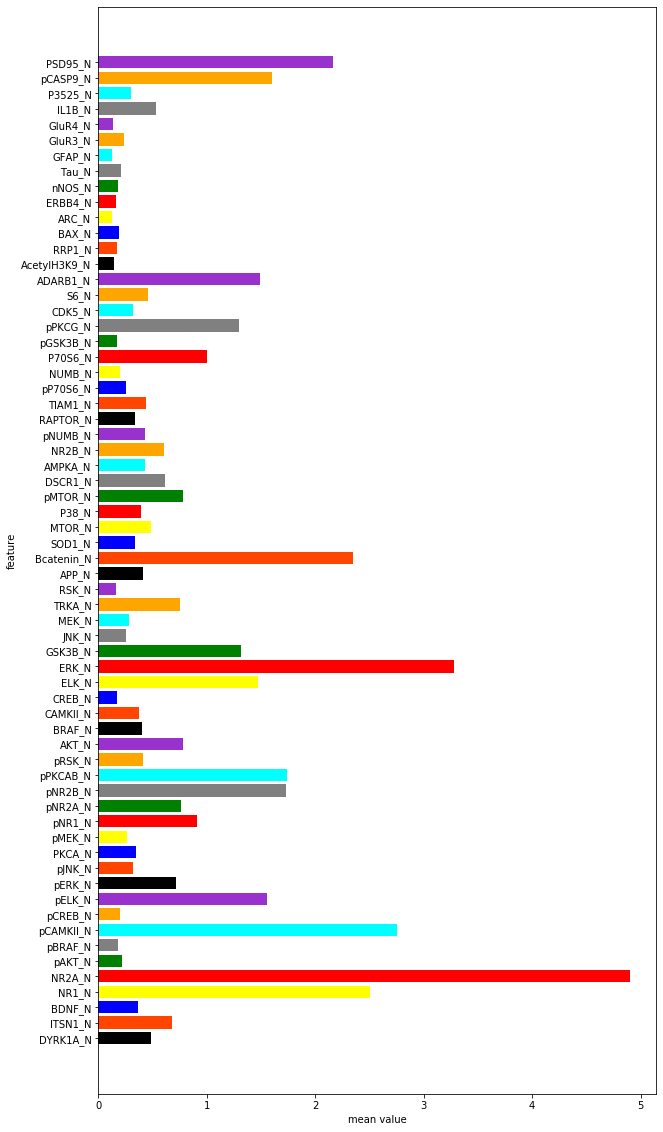

In [10]:
plt.figure(figsize=(10,20))
plt.barh(namen,means,color=colors)
plt.xlabel('mean value')
plt.ylabel('feature')
plt.show()

Visualize the variance of each predictor.

In [11]:
df_new = df
df_new = df_new.replace(np.nan,0)

DYRK1A_N 0.062453339195938554
ITSN1_N 0.06414305697280279
BDNF_N 0.0027117009807409755
NR1_N 0.13478450152500857
NR2A_N 0.9083809628060677
pAKT_N 0.0018776116087542778
pBRAF_N 0.0008201672806038519
pCAMKII_N 1.7059077534757632
pCREB_N 0.0011831538934900978
pELK_N 0.22284572171845715
pERK_N 0.11962228272781658
pJNK_N 0.0029639755161046315
PKCA_N 0.0029985386736677924
pMEK_N 0.0023327185421777633
pNR1_N 0.01575428181207827
pNR2A_N 0.03668181184459008
pNR2B_N 0.07978539899843357
pPKCAB_N 0.23769728111837785
pRSK_N 0.004971961800519676
AKT_N 0.017468583834872004
BRAF_N 0.04704718091568294
CAMKII_N 0.003096282840866341
CREB_N 0.0007830535991053174
ELK_N 0.13333366543563877
ERK_N 0.44230776781069236
GSK3B_N 0.06349042801150048
JNK_N 0.0013067640400048085
MEK_N 0.002153884262594428
TRKA_N 0.01587570032203542
RSK_N 0.0008673682074182672
APP_N 0.0041821858226718045
Bcatenin_N 0.26204566838173377
SOD1_N 0.07924254229097083
MTOR_N 0.004839910730467522
P38_N 0.008420918222875254
pMTOR_N 0.01653345

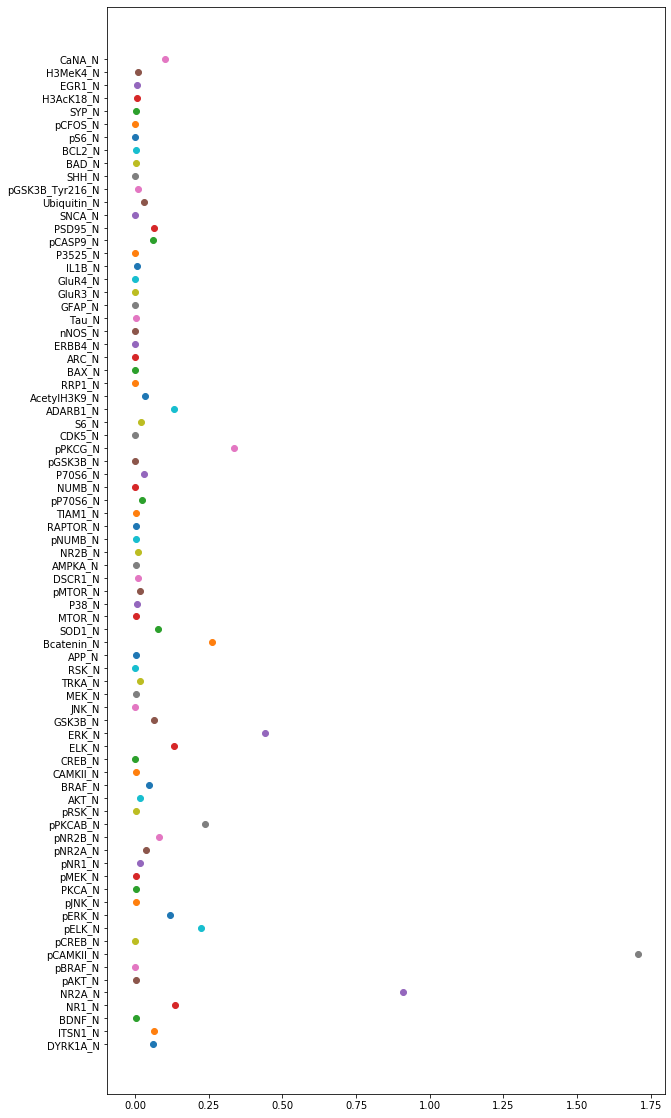

In [12]:
fig,ax = plt.subplots(figsize =(10,20))

def variance(scores):
    average = sum(scores)/len(scores)
    variance = 0
    for score in scores:
        variance = variance + (average - score) ** 2
    
    return variance/len(scores)

for x in range(1,78):
    print (df_new.columns[x],variance(df_new.iloc[:,x]))
    ax.scatter(variance(df_new.iloc[:,x]),df_new.columns[x])


**Task 1.2: Data Preprocessing**:  
- Write a function `split_data(X, y, frac, max_samples, seed)` that first shuffles your training data and then splits it into a training and a test set. `frac` determines the relative size of the test dataset, `seed` makes sure we get reproducible 
results.  
- Write a function `preprocess(X, y)` which zero-centers your data and sets variance to one.

In [13]:
from sklearn.utils import shuffle

def split_data(X, y, frac, max_samples, seed):
    if seed is not None:
        np.random.seed(seed)

    idx = np.arange(X.shape[0])
    idx_shuffled = np.random.permutation(idx) # shuffle indices to split into training and test set
    
    n_trainset = int((1-frac) * len(X))
    n_testset = len(X) - n_trainset

    test_idx = idx_shuffled[:n_testset]
    train_idx = idx_shuffled[n_testset:n_testset+n_trainset]

    X_test = X[test_idx]
    y_test = y[test_idx]
    print('Test set shapes (X and y):', X_test.shape, y_test.shape)

    X_train = X[train_idx]
    y_train = y[train_idx]
    print('Training set shapes (X and y):',X_train.shape, y_train.shape)

    return X_train,y_train,X_test,y_test


In [14]:
X_train,y_train,X_test,y_test = split_data(X_all, t_all, 0.3, None, 1)

Test set shapes (X and y): (32, 64) (32,)
Training set shapes (X and y): (73, 64) (73,)


In [15]:
X_train[1].shape

len(X_train)
for i in range(0,64):
    mean = np.mean(X_train[:,i])
    std = np.std(X_train[:,i])
    for j in range(len(X_train)):
        X_std = ((X_train[j,i])-mean)/std
        X_variance = (((X_train[j,i])**2)-mean)/(len(X_train)-1)
        #print('New line')
        #print(X_variance) 

In [16]:
def preprocess(X, y):
    
    X_std = np.empty((len(X),64),dtype = float)
    
    for i in range(0,64):
        mean = np.mean(X[:,i])
        std = np.std(X[:,i])
    
        for j in range(0,len(X)):
            X_std[j,i-1] = ((X[j,i])-mean)/std
           
    return X_std
    
    

In [17]:
X_scaled = preprocess(X_train, y_train)
X_scaled.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Task 2: LDA

First, use Linear Discriminant Analysis to separate the classes. As discussed in the Bishop in pg. 186-189, we can find a weight vector $\vec{w}$ that performs a projection of the i-th input data point $\vec{x}_i$

$p =   \vec{w}^T \vec{x}_i$

that optimally separates the classes.

Use the analytic solution to compute the optimal weights $\vec{w}$ from the training set data. 

** Task 2.1 ***

1. Implement a function `compute_lda_weights(x, y)`, which carries out LDA using the data `x,y`. 
2. Apply this function on your training data.
3. Visualize the obtained weight vector $\vec{w}$ using a `plt.stemplot`.

In [18]:
def compute_lda_weights(x, y):
    # 1. Compute the mean vector total_mean 
    total_mean = np.mean(x,axis=0).reshape(64,1)
    
    #2. the mean vector per class 
    mean_per_class = []

    for i,orchid in enumerate(np.unique(y)):
        mean_per_class.append(np.mean(x[y==orchid],axis=0))
    mean_per_class = np.array(mean_per_class).T
    
    # 3. Compute the Scatter within and Scatter between matrices
    #SW : Scatter within matrix
    #SB : Scatter Between Matrix

    data_SW = []
    Nc = []
    for i,orchid in enumerate(np.unique(y)):
        a = np.array(x[y==orchid]-mean_per_class[:,i].reshape(1,64))
        data_SW.append(np.dot(a.T,a))
        Nc.append(np.sum(y==orchid))
    SW = np.sum(data_SW,axis=0)

    SB = np.dot(Nc*np.array(mean_per_class-total_mean),np.array(mean_per_class-total_mean).T)
    
    # 4. Compute the Eigenvalues and Eigenvectors of SW^-1 SB

    eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))
    
    # 5. Select the two largest eigenvalues 

    eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
    eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
    weights = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real))
    #weights = np.hstack(eigen_pairs[0][1][:,np.newaxis].real)
    
    return weights

In [19]:
weights = compute_lda_weights(X_train, y_train)
w_lda= np.array(X_train.dot(weights))

Text(0.5, 0, 'predictors')

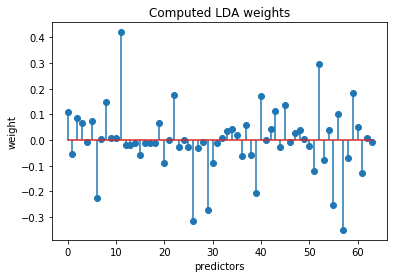

In [20]:
plt.stem(weights[:,0].flatten(), use_line_collection=True)
plt.title('Computed LDA weights')
plt.ylabel('weight')
plt.xlabel('predictors')

In [21]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit_transform(X_train,y_train.ravel())
weights_c=clf.coef_

Text(0.5, 0, 'predictors')

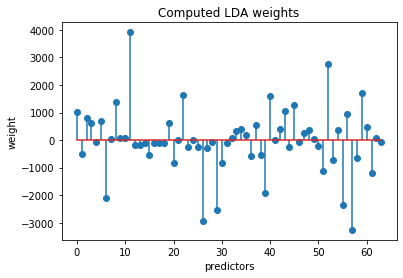

In [22]:
#weights = np.random.uniform(-0.2,0.3,60)
plt.stem(weights_c.flatten(), use_line_collection=True)
plt.title('Computed LDA weights')
plt.ylabel('weight')
plt.xlabel('predictors')

** Task 2.3 **

Project the training data and the test data on $\vec{w}$. Visualize the class separation using a two-color histogram. 
- Is the class separation good?
- Is there a big difference between training and test data?

In [23]:
#weights[:,1].shape
p_train = weights[:,0].T.dot(X_train.reshape(64,73))
p_test = weights[:,0].T.dot(X_test.reshape(64,32))
#print(p.shape,X_train.reshape(64,73).shape)

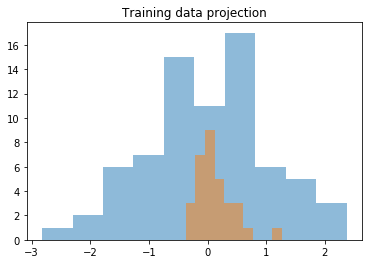

In [24]:
#a, b = np.random.normal(2, 1, 20), np.random.normal(0, 1, 20)  # example data

plt.title('Training data projection')
_ = plt.hist(p_train,label='class 0',alpha=0.5)
_ = plt.hist(p_test,label='class 1',alpha=0.5)

** Task 2.4 **

Now we make class predictions based on the projections. Read https://en.wikipedia.org/wiki/Linear_discriminant_analysis#Fisher's_linear_discriminant and compute threshold $c$ for the projected values $p$ based on the training data. Print the value of $c$ and plot $c$ into the histograms of projected values you made before!

Use $c$ to assign class labels for training and test set. Determine the classification errors on both datasets and print them. 

In [25]:
mean_X_train = []
mean_X_test = []

for i,orchid in enumerate(np.unique(y_train)):
        mean_X_train.append(np.mean(X_train[y_train==orchid],axis=0))
      
        
for i,orchid in enumerate(np.unique(y_test)):
        mean_X_test.append(np.mean(X_test[y_test==orchid],axis=0))
        
#Calculate C

c = weights[:,0].dot(0.5*sum(mean_X_train+mean_X_test))
c

0.020035351587701013

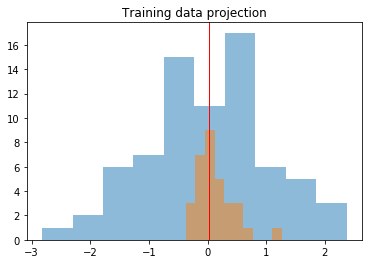

In [26]:
plt.title('Training data projection')
_ = plt.hist(p_train,label='class 0',alpha=0.5)
_ = plt.hist(p_test,label='class 1',alpha=0.5)

plt.axvline(c, color='r', linewidth=1)

In [27]:
q_train = []
q_test = []

for i in range(0,len(p_train)):
    if p_train[i]<c:
        q_train.append(0)
    else:
        q_train.append(1)
        
for i in range(0,len(p_test)):
    if p_test[i]<c:
        q_test.append(0)
    else:
        q_test.append(1)
        
#q_test

In [28]:
y_train_new = y_train
y_test_new = y_test

y_train_new = y_train_new.astype(int)
y_test_new = y_test_new.astype(int)

In [29]:
error_train = np.subtract(y_train_new, q_train )
error_test = np.subtract(y_test_new, q_test )

In [30]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_train_new, q_train))

print(metrics.confusion_matrix(y_train_new, q_train))

0.5205479452054794
[[17 14]
 [21 21]]


In [31]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test_new, q_test))

print(metrics.confusion_matrix(y_test_new, q_test))

0.65625
[[14  7]
 [ 4  7]]


In [32]:
# Classification error calculation

def classification_error(x,y):
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(x, y)
    print(confusion)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    classification_error = (FP + FN) / float(TP + TN + FP + FN)
    
    return classification_error

In [33]:
classification_error_train = classification_error(y_train_new, q_train)
print(classification_error_train,"\n")
classification_error_test = classification_error(y_test_new, q_test)
print(classification_error_test)

[[17 14]
 [21 21]]
0.4794520547945205 

[[14  7]
 [ 4  7]]
0.34375


## Task 3: Logistic Regression

Next, we will consider classification using Logistic Regression. Below, you find all imports that are necessary.


In [34]:
import numpy as np
from sklearn.linear_model import LogisticRegression

**Task 3.1: Iterative Reweighted Least Squares**

1. Implement the IRLS algorithm and output at each iteration the current training error. Remember the weight are updated according to:
$$ w' = w - ( \Phi^T R \Phi ) ^ {-1} \Phi^T (y - t)$$
Where $y$ is the prediction, $t$ the ground truth target, $R$ the weighting matrix and $\Phi$ the design matrix.
2. Apply the IRLS algorithm on data and compute a test error (see the code below).
3. Compare the results of your implementation to the sklearn implementation of `LogisticRegression(penalty='none')`. Do you get the same result?
4. Use the `preprocess` function defined earlier to normalize the data.

In [35]:
from sklearn.metrics import accuracy_score

def y(X, w):
    return 1/(1 + np.exp(-X.dot(w)))

def R(y):
    R = np.identity(y.size)
    R = R*(y*(1-y))
    return R

def irls(X, t):
    w = np.zeros(X.shape[1])
    w = w.reshape(w.size, 1)
    t = np.array(list(map(lambda x: 1 if x else 0, t)))
    t = t.reshape(t.size, 1)
    train_errors=[]
    #becomes non invertable/singular after 3 iterations
    for i in range(3):
        y_ = y(X,w)
        w = w - np.linalg.inv(X.T.dot(R(y_)).dot(X)).dot((X.T).dot(y_-t))
        print(train_errors.append(accuracy_score(t,y_.round())))
    return w

In [36]:
gewichte=irls(X_train,y_train)

None
None
None


In [37]:
clf = LogisticRegression(penalty = 'none')
clf.fit(X_test, y_test)
clf.score(X_test,y_test)
test_errors = []
test_errors.append(clf.score(X_test, y_test))
test_errors

[1.0]

In [38]:
X_train_norm = preprocess(X_train,y_train)
X_test_norm = preprocess(X_test,y_test)

**Task 3.2: Logistic Regression with Regularization**

1. Set sklearn's penalty parameter to `l1` and `l2`. Use the range `np.linspace(0.02, 1, 25)` for the parameter `C`, which controls the strength of regularization.
2. Plot strength of regularization over accuracy. Does regularization improve the scores?
3. Visualize the coefficients of the regularized settings and the unregularized setting. What do you observe?
3. Compare the coefficients to the LDA weights.

In [39]:
from matplotlib import pyplot as plt

Training accuracy:  0.4246575342465753
Test accuracy:  0.65625
Training accuracy:  0.5753424657534246
Test accuracy:  0.34375
Training accuracy:  0.8082191780821918
Test accuracy:  0.71875
Training accuracy:  0.8767123287671232
Test accuracy:  0.9375
Training accuracy:  0.8767123287671232
Test accuracy:  0.96875
Training accuracy:  0.9178082191780822
Test accuracy:  0.96875
Training accuracy:  0.9315068493150684
Test accuracy:  0.96875
Training accuracy:  0.9452054794520548
Test accuracy:  0.96875
Training accuracy:  0.9452054794520548
Test accuracy:  1.0
Training accuracy:  0.9452054794520548
Test accuracy:  1.0
Training accuracy:  0.9452054794520548
Test accuracy:  1.0
Training accuracy:  0.9452054794520548
Test accuracy:  1.0
Training accuracy:  0.958904109589041
Test accuracy:  1.0
Training accuracy:  0.958904109589041
Test accuracy:  1.0
Training accuracy:  0.958904109589041
Test accuracy:  1.0
Training accuracy:  0.958904109589041
Test accuracy:  1.0
Training accuracy:  0.9589041

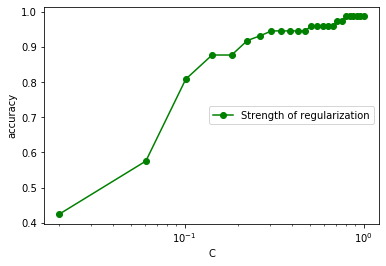

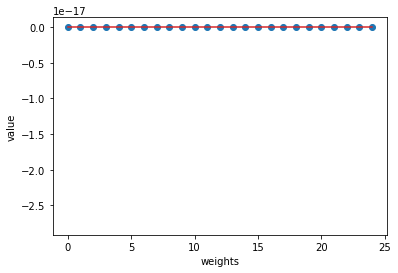

Training accuracy:  0.5753424657534246
Test accuracy:  0.34375
Training accuracy:  0.5753424657534246
Test accuracy:  0.34375
Training accuracy:  0.5753424657534246
Test accuracy:  0.34375
Training accuracy:  0.5753424657534246
Test accuracy:  0.34375
Training accuracy:  0.5753424657534246
Test accuracy:  0.34375
Training accuracy:  0.5753424657534246
Test accuracy:  0.34375
Training accuracy:  0.5753424657534246
Test accuracy:  0.34375
Training accuracy:  0.589041095890411
Test accuracy:  0.375
Training accuracy:  0.6027397260273972
Test accuracy:  0.375
Training accuracy:  0.6027397260273972
Test accuracy:  0.40625
Training accuracy:  0.6027397260273972
Test accuracy:  0.4375
Training accuracy:  0.6164383561643836
Test accuracy:  0.4375
Training accuracy:  0.6164383561643836
Test accuracy:  0.53125
Training accuracy:  0.6575342465753424
Test accuracy:  0.53125
Training accuracy:  0.684931506849315
Test accuracy:  0.53125
Training accuracy:  0.6986301369863014
Test accuracy:  0.5625
T

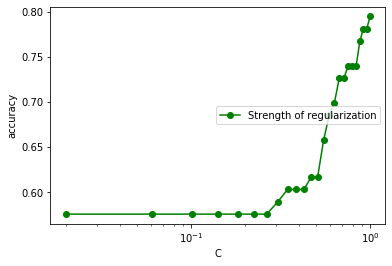

Text(0.5, 0, 'weights')

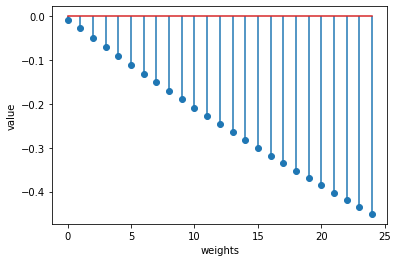

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#use preprocessing to normalize the data
X_train_std = preprocessing.normalize(X_train)
X_test_std = preprocessing.normalize(X_test)

weights, params, accuracy = [], [], []
for c in np.linspace(0.02, 1, 25):
    #lr = LogisticRegression(penalty='none',C=c, random_state=0)
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear', multi_class='ovr')
    #lr = LogisticRegression(penalty='l2', C=c, solver='liblinear', multi_class='ovr')
    lr.fit(X_train, y_train)
    print('Training accuracy: ', lr.score(X_train, y_train))
    print('Test accuracy: ', lr.score(X_test, y_test))
    accuracy.append(lr.score(X_train, y_train))
    weights.append(lr.coef_)
    params.append(c)

pred = clf.predict(X_test)
print(pred.shape)
print(pred)

print(accuracy_score(y_test, pred))

weights = np.array(weights)
accuracy = np.array(accuracy)
# Decision region drawing

plt.plot(params, accuracy, color='green',  marker='o', label='Strength of regularization')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show()
plt.stem(weights[:,:,0].flatten(), use_line_collection=True)
plt.ylabel('value')
plt.xlabel('weights')
plt.show()



weights, params, accuracy = [], [], []
for c in np.linspace(0.02, 1, 25):
    #lr = LogisticRegression(C=10**c, random_state=0)
    #lr = LogisticRegression(penalty='l1', C=c, solver='liblinear', multi_class='ovr')
    lr = LogisticRegression(penalty='l2', C=c, solver='liblinear', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    print ('Training accuracy: ', lr.score(X_train_std, y_train))
    print ('Test accuracy: ', lr.score(X_test_std, y_test))
    accuracy.append(lr.score(X_train_std, y_train))
    weights.append(lr.coef_)
    params.append(c)

pred = clf.predict(X_test_std)
print(pred.shape)
print(pred)
print(accuracy_score(y_test, pred))

weights = np.array(weights)
accuracy = np.array(accuracy)
# Decision region drawing

plt.plot(params, accuracy, color='green',  marker='o', label='Strength of regularization')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show()
plt.stem(weights[:,:,0].flatten(), use_line_collection=True)
plt.ylabel('value')
plt.xlabel('weights')

The larger c, the less penalty for the parameters norm (l1,l2). Stronger regularization pushes coefficients more and more towards zero although some coefficients become exactly zero.

The weights with penality=l2 are all negative while the LDA weights are both positive and negative.

### Task 3.3: Arryhtymia and Ionosphere Dataset

Next, let's run your code on the datasets from openml below.

1. First, explore the dataset. Which differences to ionosphere do you encounter?   
2. Run your IRLS implementation on unprocessed data and preprocessed data. Does it work? If not, why?
3. Compare with sklearn Logistic Regression.

In [42]:
from sklearn.datasets import fetch_openml
X_arr, t_arr = fetch_openml('arrhythmia', version=1, return_X_y=True)
X_arr = np.nan_to_num(X_arr)[:, :25]
t_arr = np.array([1 if l == '1' else 0 for l in t_arr])

X_ion, t_ion = fetch_openml('ionosphere', version=1, return_X_y=True)
t_ion = np.array([1 if l == 'g' else 0 for l in t_ion])


In [43]:
from sklearn.model_selection import train_test_split

X_arr_train, X_arr_test, t_arr_train, t_arr_test = train_test_split(X_arr, t_arr, test_size=0.3, random_state=56)
 
X_arr_train_std = preprocessing.normalize(X_arr_train)
X_arr_train_std = preprocessing.normalize(X_arr_test)

lrarr = LogisticRegression()
lrarr.fit(X_arr_train,t_arr_train)
#y_pred=lrarr.predict(X_arr_test)

lrion = LogisticRegression().fit(X_ion,t_ion)

C:\Users\kanik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1. We can see that the arrhythmia dataset has a lot of missing values. And the openml data has ones in the first column and also has negative values.
2. It does not work. 
3. The unprocessed data has lower accuracy than data that is processed. With normalized data the accuracy increases.